In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!tree /md/gilee/Multiverse/ic_gen/music_ic

/md/gilee/Multiverse/ic_gen/music_ic
├── check-power-sepctrum.ipynb
├── FFT.ipynb
├── final
│   ├── box-cell-setup
│   ├── box_lbase07
│   │   ├── camb_transfer_z200_w0-1.0_wa+0.0_klogint000.txt
│   │   ├── dump_transfer.txt
│   │   ├── ics_example.conf
│   │   ├── ics_example.conf_log.txt
│   │   ├── ics_ramses
│   │   │   ├── level_007
│   │   │   │   ├── ic_deltab
│   │   │   │   ├── ic_poscx
│   │   │   │   ├── ic_poscy
│   │   │   │   ├── ic_poscz
│   │   │   │   ├── ic_velbx
│   │   │   │   ├── ic_velby
│   │   │   │   ├── ic_velbz
│   │   │   │   ├── ic_velcx
│   │   │   │   ├── ic_velcy
│   │   │   │   └── ic_velcz
│   │   │   └── ramses.nml
│   │   ├── input_powerspec.txt
│   │   ├── log.txt
│   │   ├── MUSIC_original
│   │   └── wnoise_0007.bin
│   ├── box_lbase09
│   │   ├── camb_transfer_z200_w0-1.0_wa+0.0_klogint000.txt
│   │   ├── dump_transfer.txt
│   │   ├── ics_example.conf
│   │   ├── ics_example.conf_log.txt
│   │   ├── ics_ramses
│   │   │   ├── level_009
│   │   │ 

│   │   └── box_lmin07
│   │       ├── camb_transfer_z200_w0-1.0_wa+0.0_klogint100_kmax20.txt
│   │       ├── dump_transfer.txt
│   │       ├── ics_example.conf
│   │       ├── ics_example.conf_log.txt
│   │       ├── ics_ramses
│   │       │   ├── level_007
│   │       │   │   ├── ic_deltab
│   │       │   │   ├── ic_poscx
│   │       │   │   ├── ic_poscy
│   │       │   │   ├── ic_poscz
│   │       │   │   ├── ic_velbx
│   │       │   │   ├── ic_velby
│   │       │   │   ├── ic_velbz
│   │       │   │   ├── ic_velcx
│   │       │   │   ├── ic_velcy
│   │       │   │   └── ic_velcz
│   │       │   └── ramses.nml
│   │       ├── input_powerspec.txt
│   │       ├── log.txt
│   │       ├── MUSIC_original
│   │       └── wnoise_0007.bin
│   ├── test_Lbox
│   │   ├── box_lmin07
│   │   │   ├── camb_transfer_z200_w0-1.0_wa+0.0.txt
│   │   │   ├── dump_transfer.txt
│   │   │   ├── ics_example.conf
│   │   │   ├── ics_example.conf_log.txt
│   │   │   ├── ics_ramses
│   │   │   │   ├── level_0

In [39]:
basePath = "/md/gilee/Multiverse/ic_gen/music_ic/MUSIC_new/box_lmin07_Tktot_z200/"

In [40]:
f = open(os.path.join(basePath, "camb_transfer.txt"))
f.readlines()
f.close()

In [41]:
z = [20]
As = 2.1646544338903384e-09 # for levelmin = 7
# As = 2.1646544338903384e-09 # for levelmin = 9
k0 = 0.05
ns = 0.96
h  = 0.72

In [42]:
# load MUSIC oupput
music_output = np.loadtxt(os.path.join(basePath, "input_powerspec.txt"), unpack=True)
music_kh  = music_output[0,:] # [1/Mpc]
music_Pc  = music_output[1,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvc = music_output[2,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pb  = music_output[3,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvb = music_output[4,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pt  = music_output[5,:] * 8*np.pi**3 # [h^{-3} Mpc^3]
music_Pvt = music_output[6,:] * 8*np.pi**3 # [h^{-3} Mpc^3]

In [43]:
# load CAMB TF table
cambfile = [file for file in os.listdir(basePath) if 'camb' in file][0]
camb_output = np.loadtxt(os.path.join(basePath, cambfile), unpack=True)
camb_kh = camb_output[0,:] # [1/Mpc]
camb_Tc = camb_output[1,:] # [dimensionless]
camb_Tb = camb_output[2,:] # [dimensionless]
camb_Tt = camb_output[6,:] # [dimensionless]
camb_Tvc = camb_output[10,:] # [dimensionless]
camb_Tvb = camb_output[11,:] # [dimensionless]

In [44]:
def compute_camb_Pk(kh, T):
    """
    Ref: Cell [52] in https://camb.readthedocs.io/en/latest/CAMBdemo.html
    """  
    k = kh*h # [1/Mpc]
    primordial_PK = As * (k/k0)**(ns-1)
    Pk = primordial_PK * T*T * k * 2*np.pi*np.pi *h*h*h # [h^{-3} Mpc^3]
    return Pk

In [45]:
camb_Pt  = compute_camb_Pk(camb_kh, camb_Tt)  # [h^{-3} Mpc^3]
camb_Pc  = compute_camb_Pk(camb_kh, camb_Tc)  # [h^{-3} Mpc^3]
camb_Pb  = compute_camb_Pk(camb_kh, camb_Tb)  # [h^{-3} Mpc^3]
camb_Pvc = compute_camb_Pk(camb_kh, camb_Tvc) # [h^{-3} Mpc^3]
camb_Pvb = compute_camb_Pk(camb_kh, camb_Tvb) # [h^{-3} Mpc^3]

<IPython.core.display.Javascript object>


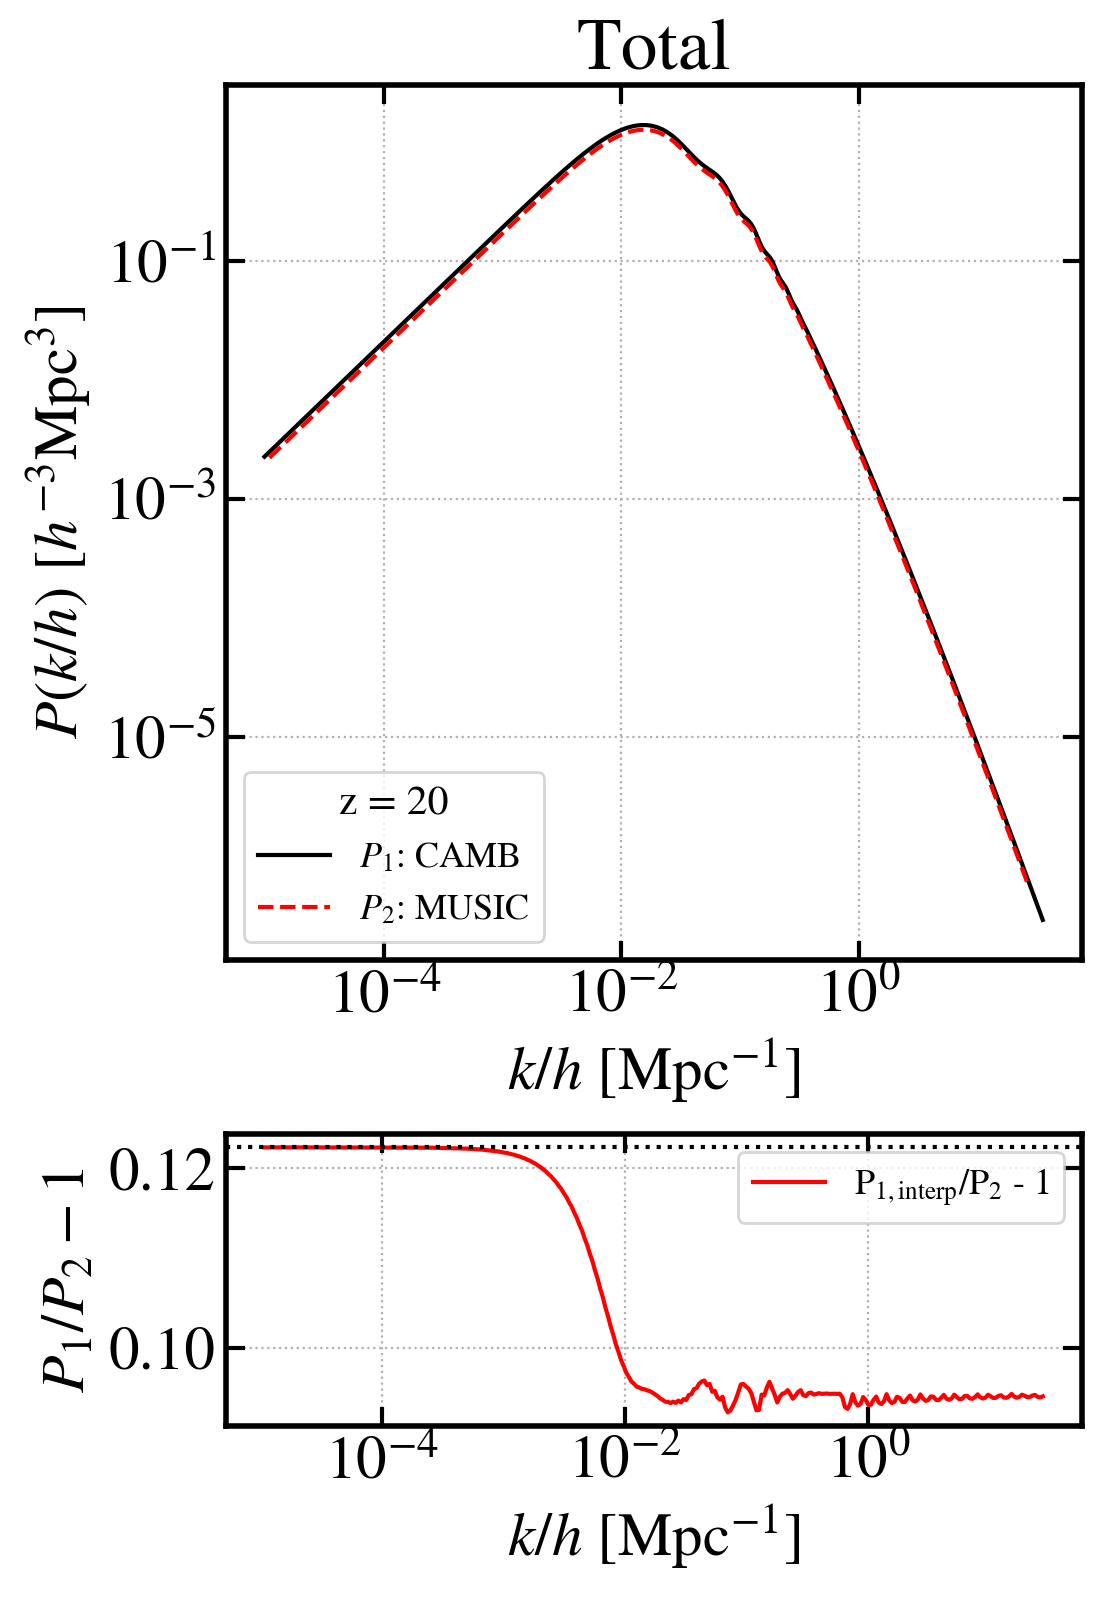

P1/P2 =  1.122331928583174
P1/P2 =  1.0945687687329209


In [46]:
# Compare the results
fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), gridspec_kw={'height_ratios': [3, 1]})

x1 = camb_kh
P1 = camb_Pt

x2 = music_kh
P2 = music_Pt

iP1 = pow(10, np.interp(np.log10(x2), np.log10(x1), np.log10(P1))) # interpolation
iP2 = pow(10, np.interp(np.log10(x1), np.log10(x2), np.log10(P2))) # interpolation

ax[0].loglog(x1, P1, c='k', label=r"$P_{1}$: CAMB")
ax[0].loglog(x2, P2, c='r', ls="--", label=r'$P_{2}$: MUSIC')
ax[0].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[0].set_ylabel(r"$P(k/h)$ [$h^{-3}$Mpc$^{3}$]") # checking the unit
ax[0].legend(title=f"z = {z[0]}", fontsize=13, title_fontsize=15)
ax[0].grid(ls=":")

# ax[1].semilogx(x1, P1/iP2 - 1, c='magenta',       label=r"$\rm P_{1}/P_{2,interp}$ - 1")
ax[1].semilogx(x2, iP1/P2 - 1, c='r', label=r"$\rm P_{1,interp}/P_{2}$ - 1")
ax[1].axhline((iP1/P2)[0] - 1, ls=":", c="k")
# ax[1].set_ylim(0.09 , 0.1)

ax[1].set_xlabel(r"$k/h$ [Mpc$^{-1}$]")
ax[1].set_ylabel(r"$P_{1}/P_{2} - 1$")
ax[1].grid(ls=":")
ax[1].legend(ncols=2, fontsize=13, title_fontsize=15)

ax[0].set_title("Total")
plt.tight_layout(pad=0.3)

print("P1/P2 = ", (iP1/P2)[0])
print("P1/P2 = ", (iP1/P2)[-1])